Traffic Vehicle Real Time Detection - EDA Notebook 1 of 2

By: Chris Heimbuch

Dataset: https://datasetninja.com/vehicle-dataset-for-yolo

Overview

This image dataset consists of 6 different classes of vehicles including cars, trucks, vans, buses, motorbikes, and threewheels. There are 2100 training images and 900 testing images. The images have annotations bounding boxes included which include the height and width of each image, and each respective class, and geometry type to surround the object. In this notebook, I will organize all of my images into folders, and perform an EDA on the image data to understand what we are working with!

In [29]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import os
import shutil
import json
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Defining path to my training images.

path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train"

In [3]:
#Make new directories

cars = os.path.join(path, "cars")
vans = os.path.join(path, "vans")
trucks = os.path.join(path, "trucks")
motorcycles = os.path.join(path, "motorcycles")
buses = os.path.join(path, "buses")
threewheels = os.path.join(path, "threewheels")
multiclass = os.path.join(path, "multiclass")

#Create new directories of all classes
os.makedirs(cars, exist_ok=True)
os.makedirs(vans, exist_ok=True)
os.makedirs(trucks, exist_ok=True)
os.makedirs(motorcycles, exist_ok=True)
os.makedirs(buses, exist_ok=True)
os.makedirs(threewheels, exist_ok=True)
os.makedirs(multiclass, exist_ok=True)


In [5]:
#set class specific output paths
annotations_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\ann"
images_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\img"
bus_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\buses"
cars_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\cars"
motorcycles_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\motorcycles"
threewheels_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\threewheels"
trucks_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\trucks"
vans_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\vans"
multiclass_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\multiclass"

In [8]:
#create a dictionary to map class names to paths
class_to_path = {
    "bus": bus_path,
    "car": cars_path,
    "motorbike": motorcycles_path,
    "threewheel": threewheels_path,
    "truck": trucks_path,
    "van": vans_path
}

#ensure class folders exist
for path in class_to_path.values():
    if not os.path.exists(path):
        os.makedirs(path)

#loop through all annotation files
for annotation_file in os.listdir(annotations_path):
    if annotation_file.endswith('.json'): 
        # Open and read the annotation file
        with open(os.path.join(annotations_path, annotation_file)) as f:
            data = json.load(f)
            
            # Iterate through objects in the annotation file
            for obj in data['objects']:
                class_name = obj['classTitle'].lower()  # Get the class title and convert to lowercase
                
                if class_name in class_to_path:  # Check if the class is in the dictionary
                    image_filename = annotation_file.replace('.json', '')  # Remove the .json extension to get the actual image filename

                    # Create the destination path for the image
                    dest_path = class_to_path[class_name]
                    
                    # Source path of the image
                    image_src = os.path.join(images_path, image_filename)
                    image_dest = os.path.join(dest_path, image_filename)

                    # Copy or move the image to the class directory
                    if os.path.exists(image_src):
                        shutil.copy(image_src, image_dest)  # Use shutil.move() if you want to move instead of copy
                    else:
                        print(f"Image {image_filename} not found.")

In [12]:
# Create a dictionary to map class names to paths
class_to_path = {
    "bus": bus_path,
    "car": cars_path,
    "motorbike": motorcycles_path,
    "threewheel": threewheels_path,
    "truck": trucks_path,
    "van": vans_path
}

# Ensure class folders and multiclass folder exist
for path in list(class_to_path.values()) + [multiclass_path]:
    if not os.path.exists(path):
        os.makedirs(path)

# Loop through all annotation files
for annotation_file in os.listdir(annotations_path):
    if annotation_file.endswith('.json'):
        # Open and read the annotation file
        with open(os.path.join(annotations_path, annotation_file)) as f:
            data = json.load(f)

        # Get the image filename from the annotation file (assumes filename ends with .jpg)
        image_filename = annotation_file.replace('.json', '')

        # Get all unique class names in the image
        object_classes = set(obj['classTitle'].lower() for obj in data.get('objects', []))

        # Determine destination path based on the number of unique classes
        if len(object_classes) > 1:
            dest_path = multiclass_path  # If multiple classes, move to multiclass folder
        else:
            # Handle single-class images
            if object_classes:
                class_name = list(object_classes)[0]
                dest_path = class_to_path.get(class_name, multiclass_path)
            else:
                dest_path = multiclass_path  # Default to multiclass if no class found

        # Source path of the image
        image_src = os.path.join(images_path, image_filename)
        image_dest = os.path.join(dest_path, image_filename)

        # Move the image to the destination path
        if os.path.exists(image_src):
            shutil.move(image_src, image_dest)  # Use shutil.copy() if you want to copy instead of move
            print(f"Moved image {image_filename} to {dest_path}.")
        else:
            print(f"Image {image_filename} not found.")

Moved image 00043_GMC Savana Van 2012.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\vans.
Moved image 00077.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\cars.
Moved image 00116.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\cars.
Moved image 00175_Ford E-Series Wagon Van 2012.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\vans.
Moved image 00241.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\cars.
Moved image 00294.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\cars.
Moved image 00300_Nissan NV Passenger Van 2012.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\vans.
Moved image 00391_Mercedes-Benz Sprinter Van 2012.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Ph

In [ ]:
class_to_path = {
    "bus": bus_path,
    "car": cars_path,
    "motorcycles": motorcycles_path,
    "threewheel": threewheels_path,
    "truck": trucks_path,
    "van": vans_path
}

In [21]:
class_directories = {
    'bus': bus_path,
    'car': cars_path,
    'motorcycles': motorcycles_path,
    'threewheel': threewheels_path,
    'truck': trucks_path,
    'van': vans_path,
    'multiclass': multiclass_path
}

# Initialize a dictionary to store the count of images per class
class_counts = {}

# Loop through each folder and count the number of images
for class_name, folder_path in class_directories.items():
    # List all files in the class folder
    image_files = os.listdir(folder_path)
    
    # Filter out non-image files (optional if you only have images in the folders)
    image_files = [f for f in image_files if f.endswith('.jpg') or f.endswith('.png')]
    
    # Store the count of images for the current class
    class_counts[class_name] = len(image_files)

# Print the distribution of images per class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'bus' has 320 images.
Class 'car' has 345 images.
Class 'motorcycles' has 260 images.
Class 'threewheel' has 208 images.
Class 'truck' has 51 images.
Class 'van' has 213 images.
Class 'multiclass' has 81 images.


In [25]:
# Define paths to your class directories
class_directories = {
    'bus': bus_path,
    'car': cars_path,
    'motorcycles': motorcycles_path,
    'threewheel': threewheels_path,
    'truck': trucks_path,
    'van': vans_path,
    'multiclass': multiclass_path
}

# Initialize a dictionary to store the count of images per class
class_counts = {}

# Loop through each folder and count the number of images
for class_name, folder_path in class_directories.items():
    if not os.path.exists(folder_path):
        print(f"Directory not found: {folder_path}")
        continue  # Skip if folder doesn't exist
    
    # List all files in the class folder
    try:
        image_files = os.listdir(folder_path)
    except OSError as e:
        print(f"Error accessing folder {folder_path}: {e}")
        continue

    # Filter files that are either .jpg, .jpeg, or .png (case-insensitive)
    valid_extensions = ('.jpg', '.jpeg', '.png')
    image_files = [f for f in image_files if f.lower().endswith(valid_extensions)]

    # Store the count of images for the current class
    class_counts[class_name] = len(image_files)

# Print the distribution of images per class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'bus' has 320 images.
Class 'car' has 345 images.
Class 'motorcycles' has 328 images.
Class 'threewheel' has 309 images.
Class 'truck' has 358 images.
Class 'van' has 334 images.
Class 'multiclass' has 106 images.


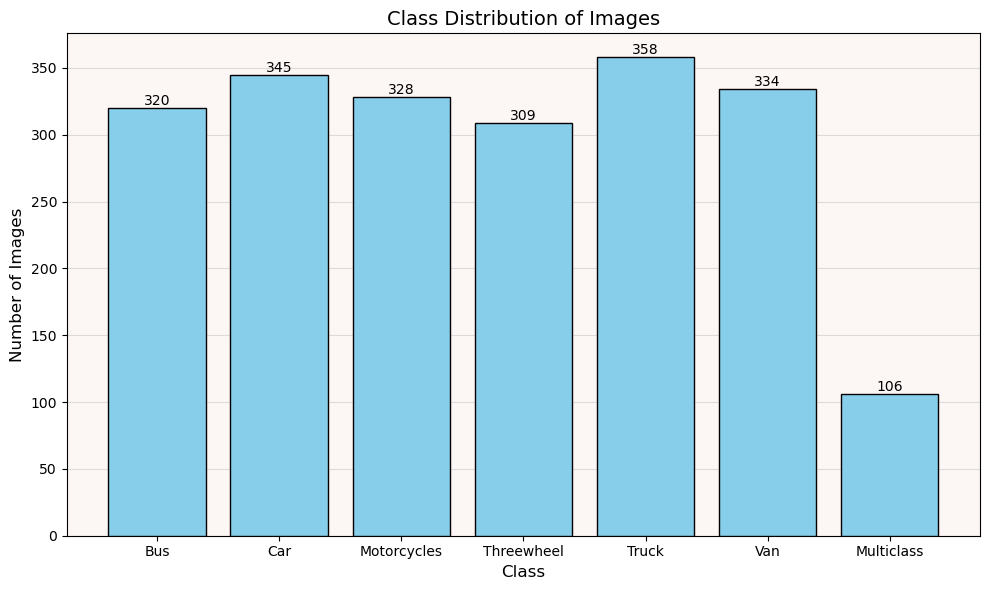

In [40]:
# Data (the class_counts dictionary from the previous step)
class_names = [name.title() for name in class_counts.keys()]
image_counts = list(class_counts.values()) 

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = plt.bar(class_names, image_counts, color='skyblue', edgecolor="black", linewidth=1, zorder=3)  

# Add labels and title
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Class Distribution of Images', fontsize=14)
ax.grid(axis='y', alpha=0.4)
ax.set_facecolor('#FCF6F5')


for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=10) 

# Rotate x-axis labels for better readability if necessary
# plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout() 
plt.show()